In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv("pima-indians-diabetes.csv")
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
df.columns = ["Pregancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction","Age","Outcome"]


In [4]:
df.head()

,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.shape

(767, 9)

In [6]:
df.describe()

,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Missing Value Detection and  Treatment
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregancies                767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isna().any()

Pregancies                  False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
df.isna().sum()

Pregancies                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df["Glucose"]

0       85
1      183
2       89
3      137
4      116
      ... 
762    101
763    122
764    121
765    126
766     93
Name: Glucose, Length: 767, dtype: int64

In [11]:
# Replacing zero with NaN and then replacing it by medain
from numpy import nan
df["Glucose"] = df["Glucose"].replace(0,np.nan)

In [12]:
df["BloodPressure"] = df["BloodPressure"].replace(0,np.nan)

In [13]:
df["Insulin"] = df["Insulin"].replace(0,np.nan)
df["SkinThickness"] = df["SkinThickness"].replace(0,np.nan)
df["BMI"] = df["BMI"].replace(0,np.nan)

In [14]:
df.isna().sum()

Pregancies                    0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df.fillna(df.median(), inplace=True)

In [16]:
df.isna().sum()

Pregancies                  0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.describe()

,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,121.621904,72.387223,29.100391,140.692308,32.453716,0.471674,33.219035,0.348110
std,3.370877,30.443252,12.104527,8.794378,86.437570,6.879539,0.331497,11.752296,0.476682
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='Age'>

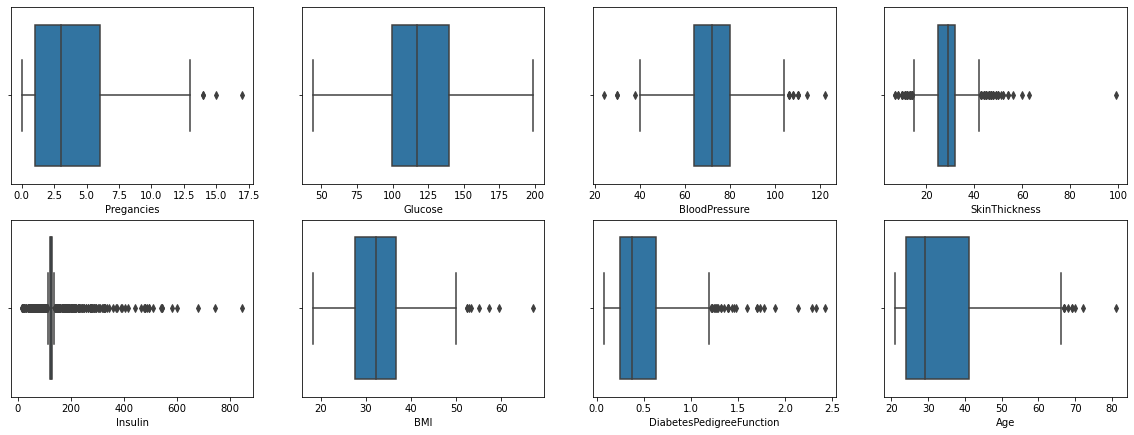

In [18]:
# outlier Detection

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df["Pregancies"])

plt.subplot(4,4,2)
sns.boxplot(df["Glucose"])

plt.subplot(4,4,3)
sns.boxplot(df["BloodPressure"])

plt.subplot(4,4,4)
sns.boxplot(df["SkinThickness"])

plt.subplot(4,4,5)
sns.boxplot(df["Insulin"])

plt.subplot(4,4,6)
sns.boxplot(df["BMI"])

plt.subplot(4,4,7)
sns.boxplot(df["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sns.boxplot(df["Age"])

In [19]:
# Numpy Clip

In [20]:
df["Pregancies"] = df["Pregancies"].clip(lower=df["Pregancies"].quantile(0.05), upper=df["Pregancies"].quantile(0.95))
df["BloodPressure"] = df["BloodPressure"].clip(lower=df["BloodPressure"].quantile(0.05), upper=df["BloodPressure"].quantile(0.95))
df["SkinThickness"] = df["SkinThickness"].clip(lower=df["SkinThickness"].quantile(0.05), upper=df["SkinThickness"].quantile(0.95))
df["Insulin"] = df["Insulin"].clip(lower=df["Insulin"].quantile(0.05), upper=df["Insulin"].quantile(0.95))
df["BMI"] = df["BMI"].clip(lower=df["BMI"].quantile(0.05), upper=df["BMI"].quantile(0.95))
df["DiabetesPedigreeFunction"] = df["DiabetesPedigreeFunction"].clip(lower=df["DiabetesPedigreeFunction"].quantile(0.05), upper=df["DiabetesPedigreeFunction"].quantile(0.95))
df["Age"] = df["Age"].clip(lower=df["Age"].quantile(0.05), upper=df["Age"].quantile(0.95))

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='Age'>

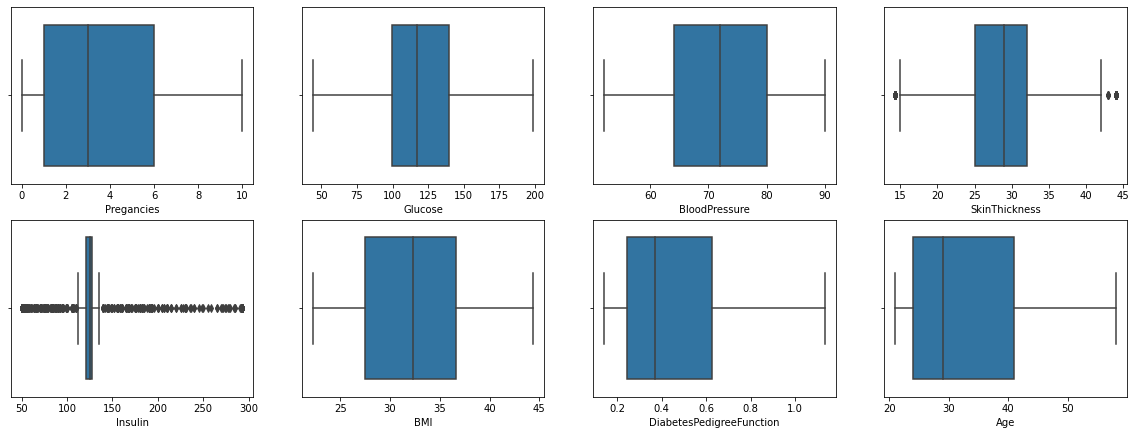

In [21]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(df["Pregancies"])

plt.subplot(4,4,2)
sns.boxplot(df["Glucose"])

plt.subplot(4,4,3)
sns.boxplot(df["BloodPressure"])

plt.subplot(4,4,4)
sns.boxplot(df["SkinThickness"])

plt.subplot(4,4,5)
sns.boxplot(df["Insulin"])

plt.subplot(4,4,6)
sns.boxplot(df["BMI"])

plt.subplot(4,4,7)
sns.boxplot(df["DiabetesPedigreeFunction"])

plt.subplot(4,4,8)
sns.boxplot(df["Age"])

In [22]:
df["SkinThickness"] = df["SkinThickness"].clip(lower=df["SkinThickness"].quantile(0.07), upper=df["SkinThickness"].quantile(0.93))

In [23]:
df["Insulin"] = df["Insulin"].clip(lower=df["Insulin"].quantile(0.20), upper=df["Insulin"].quantile(0.80))

C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

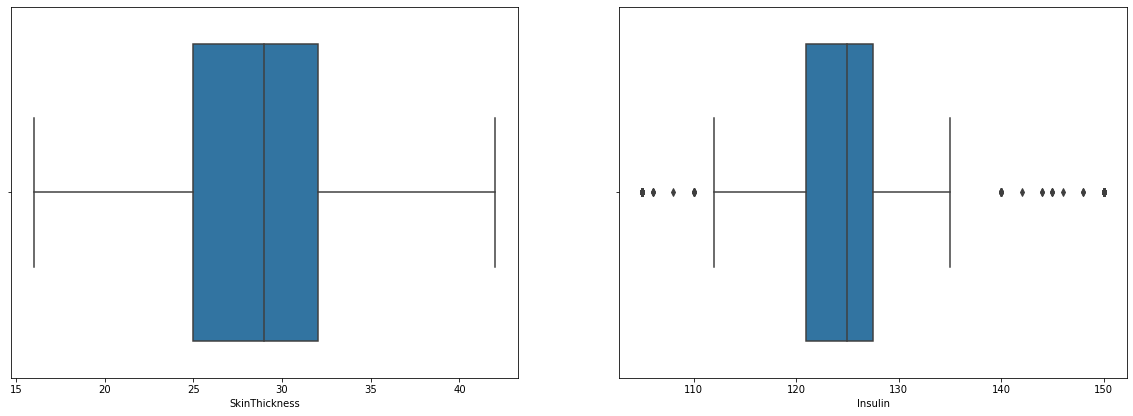

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(df["SkinThickness"])

plt.subplot(2,2,2)
sns.boxplot(df["Insulin"])

In [29]:
df["Insulin"] = df["Insulin"].clip(lower=df["Insulin"].quantile(0.25), upper=df["Insulin"].quantile(0.75))

<AxesSubplot:xlabel='Insulin'>

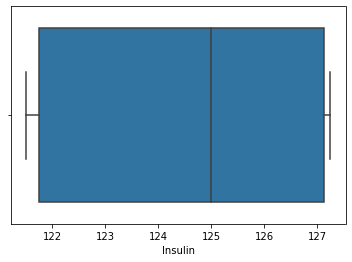

In [30]:
sns.boxplot(df["Insulin"])

In [32]:
df.describe()

,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.739244,121.621904,72.159061,28.921773,124.685789,32.327718,0.457006,32.929596,0.348110
std,3.124870,30.443252,10.449967,7.211221,2.067173,6.200304,0.276937,10.996807,0.476682
min,0.000000,44.000000,52.000000,16.000000,121.500000,22.230000,0.140300,21.000000,0.000000
25%,1.000000,99.500000,64.000000,25.000000,121.750000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.125000,36.600000,0.625000,41.000000,1.000000
max,10.000000,199.000000,90.000000,42.000000,127.250000,44.410000,1.133300,58.000000,1.000000


C:\Users\HARDIK\anaconda3\anaconda1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

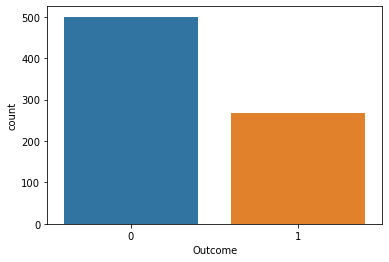

In [27]:
sns.countplot(df["Outcome"])

C:\Users\HARDIK\AppData\Local\Temp/ipykernel_12624/2638990649.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True, square=True)


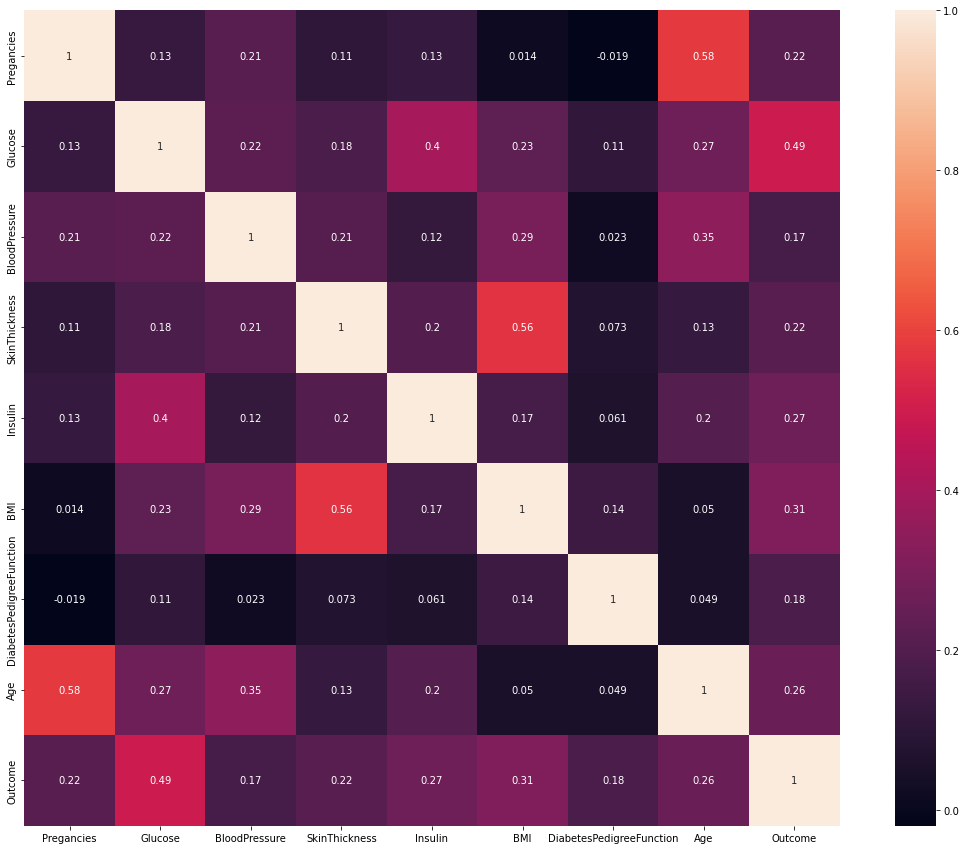

In [28]:
# Co-relation Plot for multi colinearity
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), annot=True, square=True)
plt.show()

In [29]:
# Naive Bayes
df.columns

Index(['Pregancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

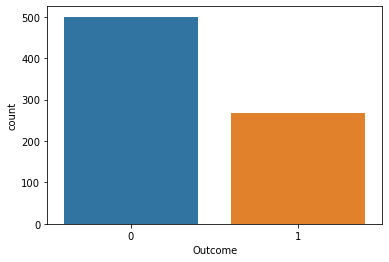

In [30]:
sns.countplot(x='Outcome' , data=df)

In [31]:
df['Outcome'].value_counts()

0    500
1    267
Name: Outcome, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
x = df.drop(['Outcome'], axis=1)

In [35]:
y =df['Outcome']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=30)

In [37]:
model = GaussianNB()

In [38]:
model.fit(x,y)

GaussianNB()

In [39]:
ypred = model.predict(xtest)

In [40]:
model.score(xtest,ytest)

0.7445887445887446

In [41]:
accuracy_score(ytest,ypred)

0.7445887445887446

In [42]:
cn = confusion_matrix(ytest, ypred)

<AxesSubplot:>

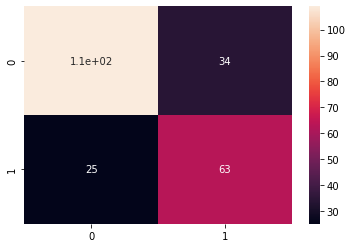

In [43]:
sns.heatmap(cn, annot=True)

In [44]:
df.shape

(767, 9)

In [45]:
# Deployment Pickle

In [46]:
import pickle

In [48]:
picked_out = open("diabetes_flask.pkl", "wb")
pickle.dump(model,picked_out)
loaded_model = pickle.load(open("diabetes_flask.pkl", "rb"))
result = loaded_model.score(xtest,ytest)
print(result)

0.7445887445887446


In [49]:
ypred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [51]:
xtest

,Pregancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
222,7.0,142.0,60.0,33.0,127.5,28.80,0.6870,58.0
609,3.0,106.0,54.0,21.0,127.5,30.90,0.2920,24.0
238,0.0,104.0,76.0,29.0,125.0,22.23,0.5820,27.0
463,10.0,115.0,90.0,29.0,125.0,24.00,1.0220,34.0
434,0.0,141.0,72.0,29.0,125.0,42.40,0.2050,29.0
...,...,...,...,...,...,...,...,...
275,7.0,106.0,60.0,24.0,125.0,26.50,0.2960,29.0
307,0.0,128.0,68.0,19.0,127.5,30.50,1.1333,25.0
479,3.0,158.0,70.0,30.0,127.5,35.50,0.3440,35.0
724,4.0,112.0,78.0,40.0,125.0,39.40,0.2360,38.0
